In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import partial_trace

In [2]:
from qiskit.quantum_info import DensityMatrix, Statevector

def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

def getStatevector(circuit):
    return Statevector(circuit).data

In [3]:
from functools import reduce

Dag = lambda matrix: matrix.conj().T
Kron = lambda *matrices: reduce(np.kron, matrices)

# 1. Circuit simulation

In [4]:
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.h(1)

circuit.ry(0.3 * np.pi/2, 0)
circuit.ry(0.4 * np.pi/2, 1)

circuit.cx(0, 1)

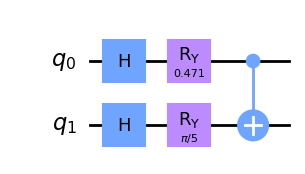

In [5]:
circuit.draw(output='mpl')

In [6]:
Z = np.matrix([[1,0],[0,-1]])

In [7]:
matrix = getDensityMatrix(circuit)
matrix

array([[0.05626829+0.j, 0.18020986+0.j, 0.11043274+0.j, 0.09182151+0.j],
       [0.18020986+0.j, 0.57715617+0.j, 0.35368175+0.j, 0.29407576+0.j],
       [0.11043274+0.j, 0.35368175+0.j, 0.21673646+0.j, 0.18020986+0.j],
       [0.09182151+0.j, 0.29407576+0.j, 0.18020986+0.j, 0.14983908+0.j]])

In [8]:
q0_state = partial_trace(matrix, [1])

In [9]:
np.trace(q0_state.data @ Z)

(-0.45399049973954647+0j)

In [10]:
q1_state = partial_trace(matrix, [0])

In [11]:
np.trace(q1_state.data @ Z)

(0.2668489204277953+0j)

# 2. matrix computaion

In [12]:
s0 = np.array([1, 0])
s1 = np.array([0, 1])

In [13]:
H = np.matrix([[1, 1], [1, -1]]) / np.sqrt(2)

In [14]:
I = np.eye(2)

In [15]:
def Ry(angle):
    matrix = np.matrix([
        [np.cos(angle/2), -np.sin(angle/2)],
        [np.sin(angle/2), np.cos(angle/2)]
    ])
    return matrix

In [16]:
Ry0 = Ry(0.3 * np.pi/2)

In [17]:
Ry1 = Ry(0.4 * np.pi/2)

In [18]:
CNOT = np.matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,0,1],
    [0,0,1,0]
])

In [19]:
init = Kron(s0, s0)

In [20]:
init

array([1, 0, 0, 0])

In [21]:
after_H = Kron(H, I) @ Kron(I, H) @ init.reshape(4, 1)
after_H

matrix([[0.5],
        [0.5],
        [0.5],
        [0.5]])

In [22]:
after_Ry = Kron(Ry0, I) @ Kron(I, Ry1) @ after_H
after_Ry

matrix([[0.23720938],
        [0.46554963],
        [0.38709053],
        [0.75970795]])

In [23]:
after_CNOT = CNOT @ after_Ry
after_CNOT

matrix([[0.23720938],
        [0.46554963],
        [0.75970795],
        [0.38709053]])

In [24]:
getStatevector(circuit)

array([0.23720938+0.j, 0.75970795+0.j, 0.46554963+0.j, 0.38709053+0.j])

In [25]:
partial_trace(after_CNOT, [0])

DensityMatrix([[0.27300475+0.j, 0.36041971+0.j],
               [0.36041971+0.j, 0.72699525+0.j]],
              dims=(2,))


# 3. single qubit test

C:\Users\Lee\AppData\Local\Temp\ipykernel_17096\1648811612.py:6: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  circuit.u2(np.pi/2, 0, 0)


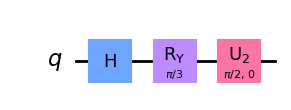

In [150]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.ry(np.pi/3, 0)

circuit.u2(np.pi/2, 0, 0)

circuit.draw(output='mpl')

In [151]:
matrix = getDensityMatrix(circuit)
matrix

array([[ 2.5000000e-01+0.j       , -2.6514381e-17+0.4330127j],
       [-2.6514381e-17-0.4330127j,  7.5000000e-01+0.j       ]])

In [152]:
np.trace(matrix @ Z)

(-0.4999999999999999+0j)

In [153]:
H @ s0

matrix([[0.70710678, 0.70710678]])

In [154]:
Ry = np.matrix([
    [np.cos(np.pi/6), -np.sin(np.pi/6)],
    [np.sin(np.pi/6), np.cos(np.pi/6)]
])

In [155]:
Ry @ H @ s0

matrix([[0.25881905, 0.96592583]])

In [162]:
U2 = np.matrix([
    [1, -1],
    [-1j, -1j]
]) / np.sqrt(2)

In [163]:
result = U2 @ Ry @ H @ s0
result

matrix([[-0.5+0.j       ,  0. -0.8660254j]])

In [164]:
result @ Z @ Dag(result)

matrix([[-0.5+0.j]])